# Open Pub Application
Let’s assume you are on a vacation in the United Kingdom with your friends. For fun, you decided to go to the Pubs nearby for some drinks. Google Map is down because of some issues.

While searching the internet, you came across https://www.getthedata.com/open-pubs. On this website, you found all the pub locations (Specifically Latitude and Longitude info). In order to impress your friends, you decided to create a web application with the data available in your hand.

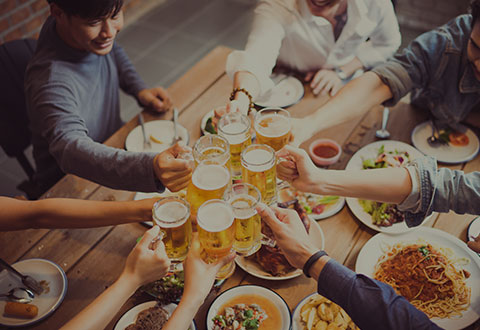

In [1]:
# Connect to Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
# Loading Dataset

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/INNOMATICS RESEARCH LAB INTERNSHIP/ML & MLOPS/P17_FIND_NEAREST_PUB/open_pubs.csv', names=['fsa_id','name','address','postcode','easting','northing','latitude','longitude','local_authority'])

In [4]:
# View first 5 rows of the DataFrame

df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


In [5]:
# Total Numbers of Rows and Columns

df.shape

(51331, 9)

In [6]:
# View information about a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   latitude         51331 non-null  object
 7   longitude        51331 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [7]:
# View descriptive statistics of the DataFrame

df.describe()

,fsa_id,easting,northing
count,51331.000000,51331.000000,5.133100e+04
mean,299395.371861,429857.397810,2.271941e+05
std,169362.451341,98559.032868,7.277388e+05
min,22.000000,78110.000000,-5.527598e+06
25%,167750.000000,361449.000000,1.792440e+05
50%,303719.000000,428772.000000,2.872490e+05
75%,438957.500000,509796.500000,4.089420e+05
max,597137.000000,655277.000000,1.209661e+06


In [8]:
# Print numerical columns of DataFrame

numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['fsa_id', 'easting', 'northing'], dtype='object')

In [9]:
# Print categorical columns of DataFrame

categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['name', 'address', 'postcode', 'latitude', 'longitude',
       'local_authority'],
      dtype='object')

In [10]:
# Printing Null Values

df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [11]:
# Printing Duplicated Values

df.duplicated().sum()

0

In [12]:
df.latitude.value_counts()

\N           767
51.310946     10
52.896164     10
53.178189      9
55.318954      8
            ... 
53.369771      1
53.390799      1
53.371238      1
53.361078      1
53.076638      1
Name: latitude, Length: 46810, dtype: int64

In [13]:
df.longitude.value_counts()

\N           767
-0.655576     12
-1.853894     10
0.349896       9
-2.051721      8
            ... 
-2.734245      1
-2.735554      1
-2.733804      1
-2.735118      1
-3.050512      1
Name: longitude, Length: 46807, dtype: int64

In [14]:
# Replacing \N values to nan

df.replace('\\N', np.nan, inplace=True)

In [15]:
df.isnull().sum()

fsa_id               0
name                 0
address              0
postcode             0
easting              0
northing             0
latitude           767
longitude          767
local_authority      0
dtype: int64

In [16]:
# Dropping nan Values

df.dropna(inplace=True)

In [17]:
df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [18]:
df.shape

(50564, 9)

In [19]:
# Converting categorical values to numerical values

df.latitude = df.latitude.astype(float)
df.longitude = df.longitude.astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50564 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fsa_id           50564 non-null  int64  
 1   name             50564 non-null  object 
 2   address          50564 non-null  object 
 3   postcode         50564 non-null  object 
 4   easting          50564 non-null  int64  
 5   northing         50564 non-null  int64  
 6   latitude         50564 non-null  float64
 7   longitude        50564 non-null  float64
 8   local_authority  50564 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


In [21]:
df.local_authority.value_counts()

County Durham         680
Leeds                 611
Cornwall              557
Wiltshire             544
Kirklees              524
                     ... 
Orkney Islands         15
East Renfrewshire      12
Na h-Eileanan Siar     11
Isles of Scilly        10
West Lothian            2
Name: local_authority, Length: 360, dtype: int64

# Top 10 locations with maximum pubs

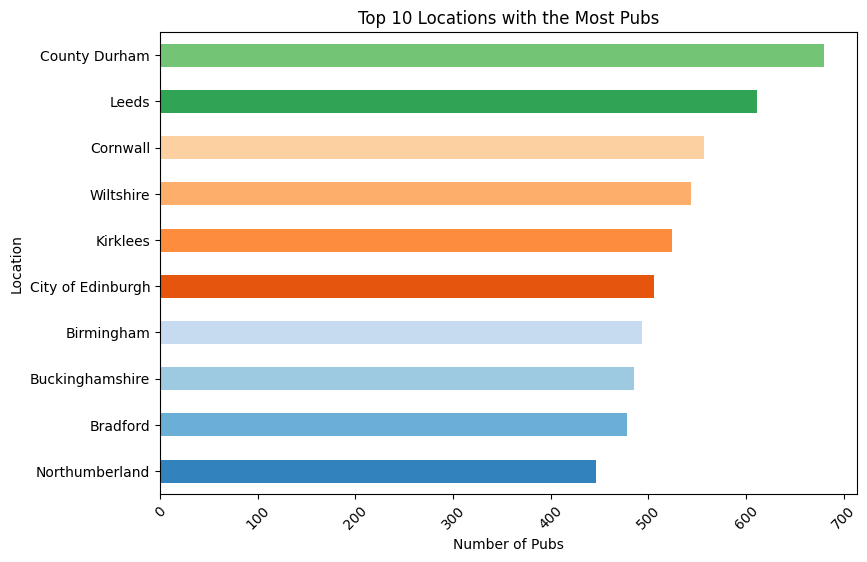

In [22]:
# Define a color scheme
colors = plt.cm.tab20c(range(10))

# Create the plot
top_10_locations = df.local_authority.value_counts().head(10).sort_values()
top_10_locations.plot(kind='barh', color=colors, figsize=(9,6))

# Customize the plot
plt.title("Top 10 Locations with the Most Pubs")
plt.xlabel("Number of Pubs")
plt.ylabel("Location")
plt.xticks(rotation=45)

# Save and show the plot
plt.savefig('pubs_by_location.png', dpi=300, bbox_inches='tight')
plt.show()

# Map Visualization

In [23]:
# Define the location and zoom level of the map
map_location = [51.970379, 0.979340]
zoom_level = 12

# Create the map object
map = folium.Map(location=map_location, zoom_start=zoom_level)

# Define the location and marker information
marker_location = [51.970379, 0.979340]
marker_tooltip = 'Open Pub'
marker_popup = 'Anchor Inn'

# Add a marker to the map
folium.Marker(location=marker_location, tooltip=marker_tooltip,
               popup=marker_popup, icon=folium.Icon(color='red')).add_to(map)

# Customize the map
folium.TileLayer('openstreetmap').add_to(map)

# Display the map
map

# Saving to csv

In [24]:
df.to_csv("cleaned.csv", index=False)

In [25]:
df1 = pd.read_csv('cleaned.csv')

In [26]:
df1.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
4,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
